## Data exploration and visualisation - Solar radiation in Sassari (period 2019 - 2021)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)

In [2]:
daily_df = pd.read_csv('../datasets/cleaned/cleaned_daily_irr.csv', index_col=0, sep=',', parse_dates=True)

In [3]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 845 entries, 2019-08-31 to 2021-12-22
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          845 non-null    int64  
 1   year           845 non-null    int64  
 2   daily_temp     845 non-null    float64
 3   daily_rain     845 non-null    float64
 4   daily_hum      845 non-null    float64
 5   daily_press    845 non-null    float64
 6   daily_windDir  845 non-null    float64
 7   daily_windSp   845 non-null    float64
 8   daily_DHI      845 non-null    float64
 9   daily_DNI      845 non-null    float64
 10  daily_GHI      845 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 79.2 KB


In [4]:
#Descriptive statistics summary
daily_df.describe()

,month,year,daily_temp,daily_rain,daily_hum,daily_press,daily_windDir,daily_windSp,daily_DHI,daily_DNI,daily_GHI
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,7.039053,2020.275740,17.966154,19.039882,62.432544,991.328876,213.164970,3.784734,132.926154,345.487101,326.778698
std,3.492665,0.701009,6.250992,6.824585,13.421667,6.310562,76.827538,2.042566,53.183687,232.611154,141.210555
min,1.000000,2019.000000,4.300000,4.500000,24.700000,967.800000,23.400000,0.900000,34.200000,0.000000,41.800000
25%,4.000000,2020.000000,12.800000,13.900000,52.700000,988.100000,175.700000,2.300000,95.500000,124.100000,209.800000
50%,7.000000,2020.000000,17.100000,19.000000,63.100000,991.500000,233.500000,3.200000,122.100000,358.500000,322.200000
75%,10.000000,2021.000000,23.400000,23.800000,73.400000,994.900000,272.900000,4.900000,164.800000,562.200000,456.100000
max,12.000000,2021.000000,33.400000,40.300000,92.400000,1011.500000,339.700000,12.000000,314.200000,780.200000,570.100000


In [5]:
#check missing values
daily_df.isnull().sum()

month            0
year             0
daily_temp       0
daily_rain       0
daily_hum        0
daily_press      0
daily_windDir    0
daily_windSp     0
daily_DHI        0
daily_DNI        0
daily_GHI        0
dtype: int64

In [6]:
daily_df.index.dtype

dtype('<M8[ns]')

### Plot of the total global irradiation per month 

In [7]:
GHI_month = daily_df.loc[: , ['month', 'daily_GHI']].groupby(by = 'month').sum()

In [8]:
GHI_month = GHI_month.rename(columns = {'daily_GHI': 'total_monthly_GHI'})

In [9]:
GHI_month

,total_monthly_GHI
month,
1,10863.7
2,16291.6
3,20083.5
4,22721.2
5,27832.7
6,29155.9
7,30582.6
8,27631.2
9,32542.8


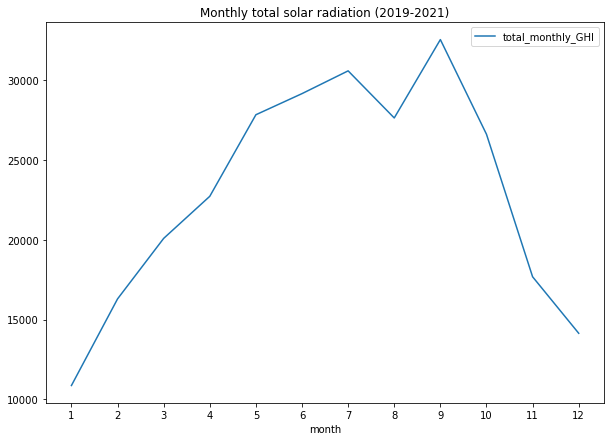

In [10]:
GHI_month.plot()
plt.xticks(GHI_month.index)
plt.title('Monthly total solar radiation (2019-2021)')
plt.show()

### Daily solar irradiation plot

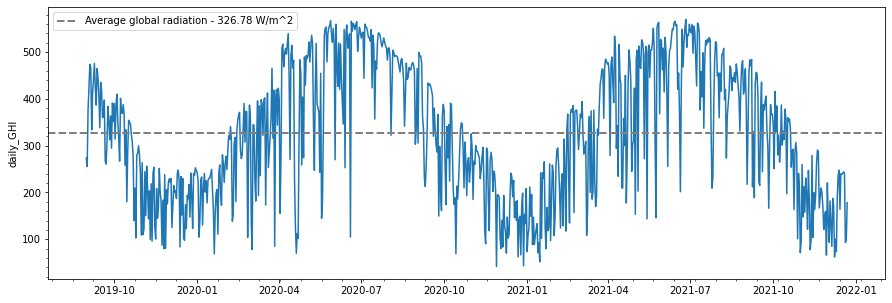

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
sns.lineplot(data=daily_df, x=daily_df.index, y=daily_df['daily_GHI'])

mean_GHI = daily_df['daily_GHI'].mean()
ax.axhline(mean_GHI, color='grey', linestyle='--', linewidth=2,
           label=f"Average global radiation - {mean_GHI:.2f} W/m^2")
ax.minorticks_on()
ax.legend()
plt.show()

#ax.set_axisbelow(True)
#ax.grid(which='major', linestyle='-', linewidth=0.8, color='grey')
#ax.grid(which='minor', visible=True, linestyle='--', linewidth=0.5, color='grey')

### Histograms of daily average quantities:
### Temperature, Pressure, Humidity, Precipitation, Wind speed and GHI

[Text(0.5, 0, 'daily average GHI (2019-2021)')]

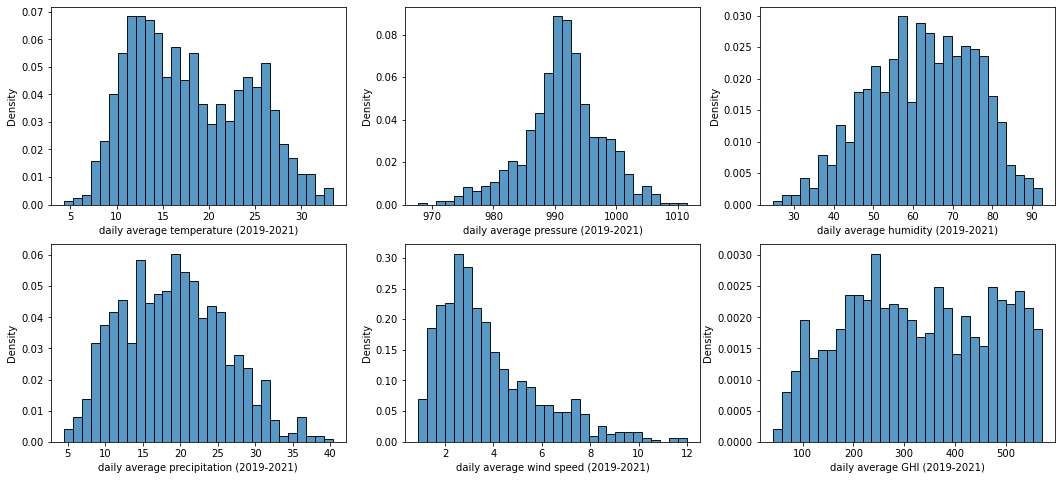

In [12]:
#stat='density' counts the number of observations and normilizes the area of the histogram
# The histogram distribution is calculated on the data of 2 years (sep2019 - ott2021)

fig, ax = plt.subplots(2, 3, figsize=(18,8))
sns.histplot(daily_df['daily_temp'], stat='density', bins=30, ax=ax[0,0])
ax[0,0].set(xlabel='daily average temperature (2019-2021)')

sns.histplot(daily_df['daily_press'], stat='density', bins=30, ax=ax[0,1])
ax[0,1].set(xlabel='daily average pressure (2019-2021)')

sns.histplot(daily_df['daily_hum'], stat='density', bins=30, ax=ax[0,2])
ax[0,2].set(xlabel = 'daily average humidity (2019-2021)')

sns.histplot(daily_df['daily_rain'], stat='density', bins=30, ax=ax[1,0])
ax[1,0].set(xlabel = 'daily average precipitation (2019-2021)')

sns.histplot(daily_df['daily_windSp'], stat='density', bins=30, ax=ax[1,1])
ax[1,1].set(xlabel = 'daily average wind speed (2019-2021)')

sns.histplot(daily_df['daily_GHI'], stat='density', bins=30, ax=ax[1,2])
ax[1,2].set(xlabel = 'daily average GHI (2019-2021)')

### Barplot of the daily mean radiation for each month

[Text(0, 0.5, 'daily average radiation (W/m^2)')]

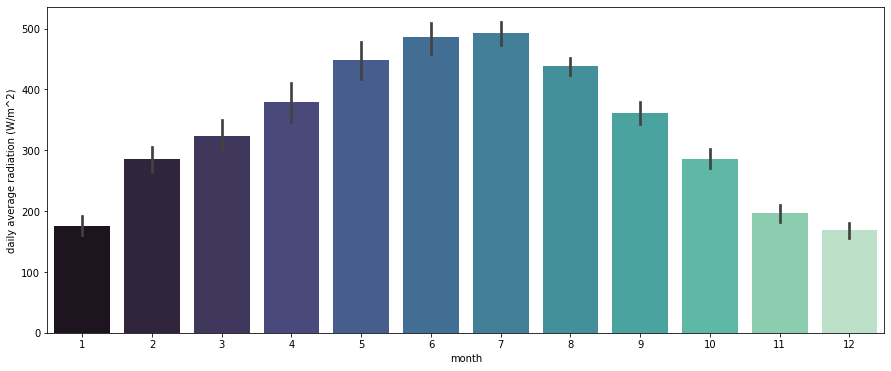

In [13]:
#The barplot estimates default the mean. Choose estimator=<stat_func> for another estimator

fig, ax = plt.subplots(1, 1, figsize=(15,6))
sns.barplot(data=daily_df, x='month', y='daily_GHI', palette='mako')
ax.set(ylabel = 'daily average radiation (W/m^2)')

### Feature correlations

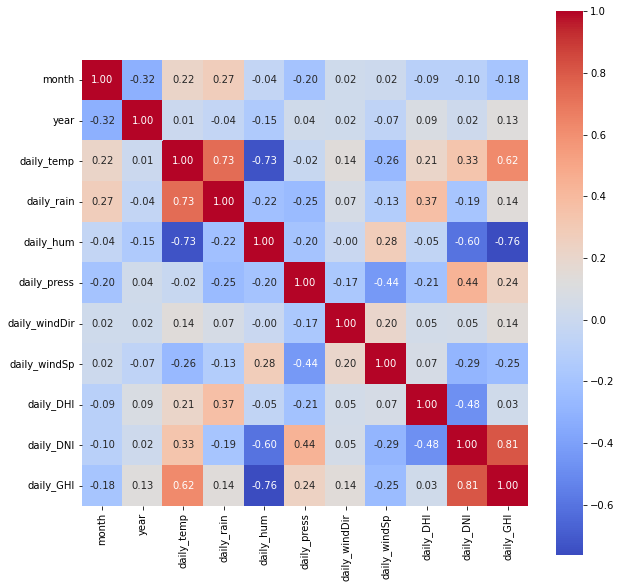

In [14]:
# pandas.DataFrame.corr computes pairwise correlations of columns, excluding NA/null values

fig, ax = plt.subplots(1, 1, figsize=(10,10))
corr = daily_df.corr(method = 'pearson')
sns.heatmap(corr, cmap='coolwarm', square=True, annot=True, fmt='.2f')
plt.show()

In [15]:
#corr

## Statistical check: stationary or non-stationary

### Augmented Dickey-Fuller test (ADF)
##### Augmented Dickey-Fuller test is a unit root test, used in statistics to check if a time series is stationary or non-stationary. 
+ Null hypothesis is "The time series is non-stationary" 
+ If p_value is below the threshold (usually 5%), then we can reject the null hypothesis and state that the time series is actually stationary.


In [16]:
from statsmodels.tsa.stattools import adfuller

#### ADF of the daily_GHI

In [17]:
adf = adfuller(daily_df['daily_GHI'], maxlag=None)

In [18]:
def print_adf(adf):
    print('test statistic: %f' % adf[0])
    print('p_value: %f' % adf[1])
    print('number of lags used: %d' % adf[2])
    print('Critical values:')
    for key, value in adf[4].items():
        print('\t %s: %f' % (key, value))

In [19]:
print_adf(adf)

test statistic: -1.781142
p_value: 0.389863
number of lags used: 16
Critical values:
	 1%: -3.438272
	 5%: -2.865037
	 10%: -2.568632


* Conclusion from ADF of daily_GHI: p_value > -2.86 --> we cannot reject the null hypothesis

#### ADF of the log of daily_GHI

In [20]:
adf = adfuller(np.log(daily_df['daily_GHI']))

In [21]:
print_adf(adf)

test statistic: -1.982446
p_value: 0.294323
number of lags used: 16
Critical values:
	 1%: -3.438272
	 5%: -2.865037
	 10%: -2.568632


* Conclusion from ADF of the logarithm of daily_GHI: p_value > -2.86 --> we cannot reject the null hypothesis

<span style="color:red"> We must conclude that our timeseries is **non-stationary**</span>.


### Calculation of ADF using a difference of 1 lag

In [22]:
delta_dailyGHI = daily_df['daily_GHI'] - daily_df['daily_GHI'].shift(1)

In [23]:
adf = adfuller(delta_dailyGHI[1:])

In [24]:
print_adf(adf)

test statistic: -9.540370
p_value: 0.000000
number of lags used: 21
Critical values:
	 1%: -3.438330
	 5%: -2.865063
	 10%: -2.568646


<font size="3"><span style="color: blue"> By differencing one time step we removed the non-stationarity.
 Then we can use the differenced signal in arima and make our forecast.
 We have to remember at the end to revert the differenciated values to the original one.</span></font>